In [1]:
from darkflow.net.build import TFNet
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
%config InlineBackend.figure_format = 'svg'

In [2]:
options ={
    'model':'cfg/tiny-yolo-voc.cfg',
    'load':'bin/yolov2-tiny-voc.weights',
    'threshold':0.33,
    'gpu' :1.0
}

In [3]:
tfnet= TFNet(options)

/home/ayush/darkflow/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2-tiny-voc.cfg not found, use cfg/tiny-yolo-voc.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/tiny-yolo-voc.cfg
Loading bin/yolov2-tiny-voc.weights ...
Successfully identified 63471556 bytes
Finished in 0.017613887786865234s
Model has a VOC model name, loading VOC labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3

In [ ]:
img=cv2.imread('image.png',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
result = tfnet.return_predict(img)
result
length=len(result)

One image processed in %f seconds 0.004032636


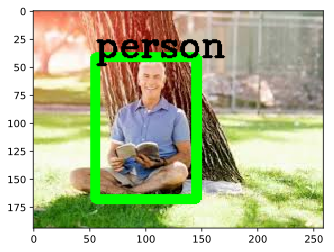

One image plotted in %f seconds 0.193315235


In [46]:
e1 = cv2.getTickCount()
for i in range(0,length):
    
    tl= (result[i]['topleft']['x'],result[i]['topleft']['y'])
    br=(result[i]['bottomright']['x'],result[i]['bottomright']['y'])
    label= result[i]['label']
    img= cv2.rectangle(img, tl,br,(0,255.0),7)
    img=cv2.putText( img,label,tl,cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
e2 = cv2.getTickCount()
time = (e2-e1)/(cv2.getTickFrequency())
print("One image processed in %f seconds",time)
e3 = cv2.getTickCount()
plt.imshow(img)
plt.show()
e4 = cv2.getTickCount()
time2 = (e4-e3)/(cv2.getTickFrequency())
print("One image plotted in %f seconds",time2)   
    

In [ ]:
capture =cv2.VideoCapture(0)
colors = [tuple(255*np.random.rand(3)) for i in range(5)]
check = True

while(check):
    #e1 = cv2.getTickCount()
    #stime = time.time()
    check,frame = capture.read()
    if check == False:
        capture.release()
        cv2.destroyAllWindows()
        break
    frame = np.asarray(frame)
    result = tfnet.return_predict(frame)
   
    if check:
        for color,result in zip(colors,result):
        
            tl= (result['topleft']['x'],result['topleft']['y'])
            br=(result['bottomright']['x'],result['bottomright']['y'])
            label= result['label']
            frame = cv2.rectangle(frame,tl,br,(0,255,0),7)
            frame=cv2.putText( frame,label,tl,cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),1)
        cv2.namedWindow('frame',cv2.WINDOW_NORMAL)
        cv2.imshow('frame',frame)
        #print('FPS {:.1f}'.format(1/(time.time()-stime)))
        if cv2.waitKey(10) & 0xFF == ord('q'):
            capture.release()
            cv2.destroyAllWindows()
            break